In [1]:
import LoadingDataset
import utils
import models
import config

GPUs Avaliable[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]:


In [2]:
X_train, X_test ,y_train , y_test = LoadingDataset.loading_imgs(show_detail=False)

100%|████████████████████████████████████████████████████████████████████████████| 1868/1868 [00:01<00:00, 1856.86it/s]


In [ ]:
model = models.create_model()

MobileNet Model Created.
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 tf.math.truediv (TFOpLambda  (None, 224, 224, 3)      0         
 )                                                               
                                                                 
 tf.math.subtract (TFOpLambd  (None, 224, 224, 3)      0         
 a)                                                              
                                                                 
 tf.math.truediv_1 (TFOpLamb  (None, 224, 224, 3)      0         
 da)                                                             
                                                                 
 tf.math.subtract_1 (TFOpLam  (None, 224, 224, 3)      0         
 bda)                               

In [4]:
history,predictions = models.run_through(model, X_train, y_train, X_test, y_test, \
                                         lr=config.learning_rate, epochs=config.epochs, BATCH_SIZE=config.batch_size)

# # If want to do it step by step use the code below
# model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate= learning_rate),loss = tf.keras.losses.binary_crossentropy, metrics=["accuracy"])
# loss0,accuracy0 = model.evaluate(x=X_test,y=y_test,batch_size=BATCH_SIZE)
# print("initial loss: {:.2f}".format(loss0))
# print("initial accuracy: {:.2f}".format(accuracy0))
# history = model.fit(x=X_train, y=y_train, epochs=epochs, validation_data=(X_test,y_test), batch_size=BATCH_SIZE, shuffle=True)
# predictions = model.predict(x=X_test)

18/18 [==============================] - 3s 27ms/step - loss: 0.7554 - accuracy: 0.3832
initial loss: 0.76
initial accuracy: 0.38
Epoch 1/30
41/41 [==============================] - 4s 45ms/step - loss: 0.9375 - accuracy: 0.5356 - val_loss: 0.7816 - val_accuracy: 0.3904
Epoch 2/30
41/41 [==============================] - 1s 33ms/step - loss: 0.9331 - accuracy: 0.5356 - val_loss: 0.7304 - val_accuracy: 0.5276
Epoch 3/30
41/41 [==============================] - 1s 33ms/step - loss: 0.9150 - accuracy: 0.5340 - val_loss: 0.7193 - val_accuracy: 0.5419
Epoch 4/30
41/41 [==============================] - 1s 33ms/step - loss: 0.8967 - accuracy: 0.5501 - val_loss: 0.7224 - val_accuracy: 0.4688
Epoch 5/30
41/41 [==============================] - 1s 33ms/step - loss: 0.8839 - accuracy: 0.5601 - val_loss: 0.7578 - val_accuracy: 0.5009
Epoch 6/30
41/41 [==============================] - 1s 33ms/step - loss: 0.8880 - accuracy: 0.5769 - val_loss: 0.7548 - val_accuracy: 0.4991
Epoch 7/30
41/41 [======

              precision    recall  f1-score   support

      Benign       0.81      0.42      0.55       347
   Malignant       0.47      0.84      0.60       214

    accuracy                           0.58       561
   macro avg       0.64      0.63      0.58       561
weighted avg       0.68      0.58      0.57       561



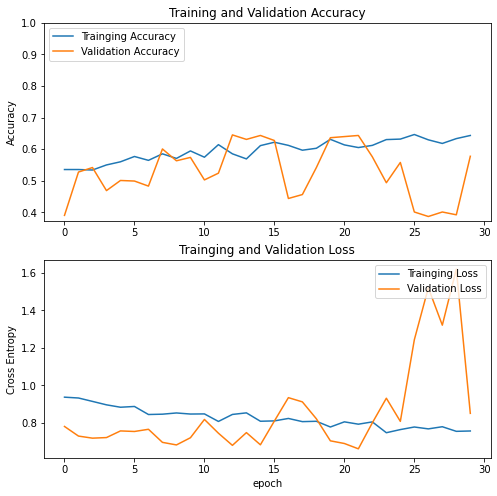

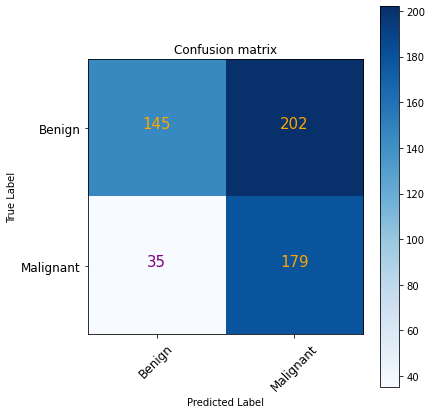

In [5]:
models.show_performance(history, predictions, X_train, y_train, X_test, y_test,\
                        save_in_csv=False, note="Testing if fuction working properly")

In [7]:
# utils.show_report(-1,show_plot=True)